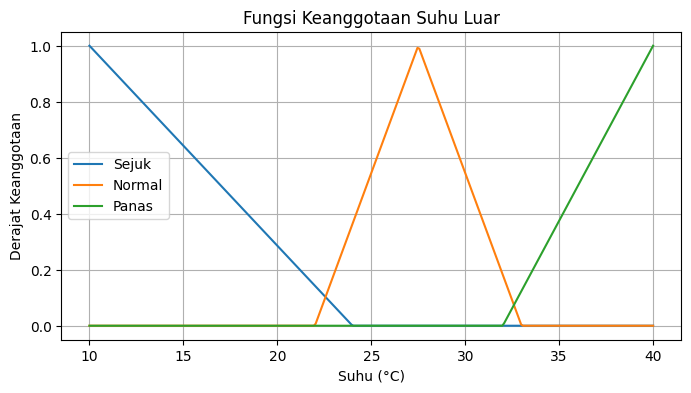

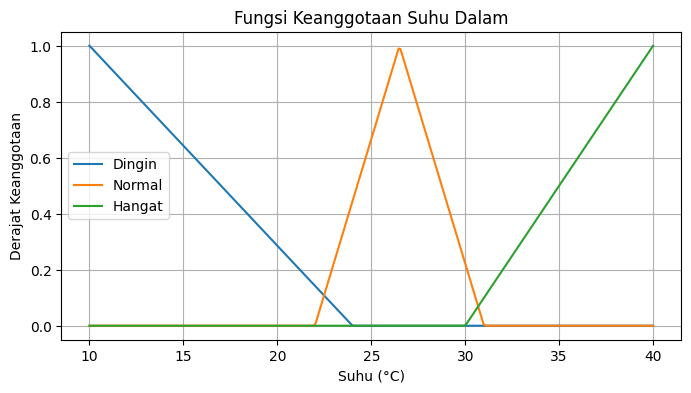

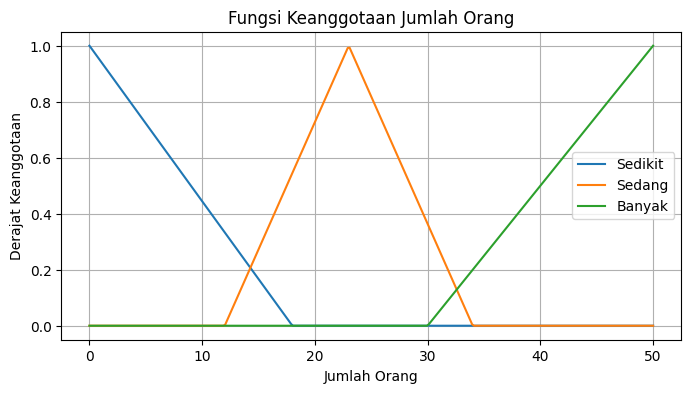


Input: Suhu Luar=34.0°C, Suhu Dalam=34.0°C, Jumlah Orang=34.0

Keanggotaan Suhu Luar:
Sejuk: 0.00
Normal: 0.00
Panas: 0.25

Keanggotaan Suhu Dalam:
Dingin: 0.00
Normal: 0.00
Hangat: 0.40

Keanggotaan Jumlah Orang:
Sedikit: 0.00
Sedang: 0.00
Banyak: 0.20

Suhu optimal hasil fuzzy Sugeno: 16.00 °C


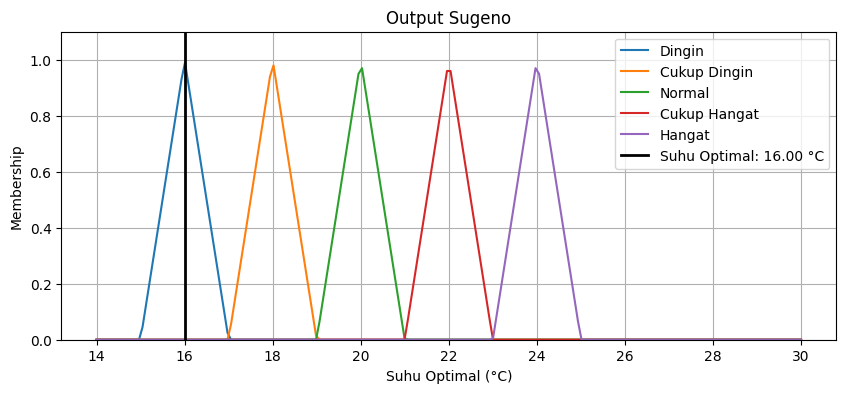

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi Keanggotaan Segitiga
def triangular(x, a, b, c):
    return np.where(x < a, 0,
           np.where(x <= b, 1 if a == b else (x - a) / (b - a),
           np.where(x <= c, 1 if b == c else (c - x) / (c - b), 0)))

# Visualisasi Fungsi Keanggotaan
def plot_membership_function(x, sets, title, xlabel):
    plt.figure(figsize=(8, 4))
    for label, (a, b, c) in sets.items():
        plt.plot(x, triangular(x, a, b, c), label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid(True)
    plt.show()

# Daftar fungsi keanggotaan
suhu_luar_sets = {'Sejuk': (10, 10, 24), 'Normal': (22, 27.5, 33), 'Panas': (32, 40, 40)}
suhu_dalam_sets = {'Dingin': (10, 10, 24), 'Normal': (22, 26.5, 31), 'Hangat': (30, 40, 40)}
jumlah_orang_sets = {'Sedikit': (0, 0, 18), 'Sedang': (12, 23, 34), 'Banyak': (30, 50, 50)}

# Visualisasi fungsi keanggotaan
x_suhu = np.linspace(10, 40, 300)
x_orang = np.linspace(0, 50, 300)

plot_membership_function(x_suhu, suhu_luar_sets, "Fungsi Keanggotaan Suhu Luar", "Suhu (°C)")
plot_membership_function(x_suhu, suhu_dalam_sets, "Fungsi Keanggotaan Suhu Dalam", "Suhu (°C)")
plot_membership_function(x_orang, jumlah_orang_sets, "Fungsi Keanggotaan Jumlah Orang", "Jumlah Orang")

# Fuzzifikasi
def fuzzify_inputs(sl, sd, jo):
    return {
        'suhu_luar': {k: triangular(sl, *v).item() for k, v in suhu_luar_sets.items()},
        'suhu_dalam': {k: triangular(sd, *v).item() for k, v in suhu_dalam_sets.items()},
        'jumlah_orang': {k: triangular(jo, *v).item() for k, v in jumlah_orang_sets.items()}
    }

# Output Singleton
output_values = {
    'Dingin': 16,           
    'Cukup Dingin': 18,     
    'Normal': 20,            
    'Cukup Hangat': 22,     
    'Hangat': 24            
}


# rule base
rules = [
    ('Sejuk', 'Dingin', 'Sedikit', 'Cukup Dingin'),
    ('Sejuk', 'Dingin', 'Sedang', 'Normal'),
    ('Sejuk', 'Dingin', 'Banyak', 'Cukup Hangat'),  
    ('Sejuk', 'Normal', 'Sedikit', 'Normal'),
    ('Sejuk', 'Normal', 'Sedang', 'Cukup Hangat'),  
    ('Sejuk', 'Normal', 'Banyak', 'Hangat'),
    ('Sejuk', 'Hangat', 'Sedikit', 'Cukup Hangat'), 
    ('Sejuk', 'Hangat', 'Sedang', 'Hangat'),
    ('Sejuk', 'Hangat', 'Banyak', 'Hangat'),        
    ('Normal', 'Dingin', 'Sedikit', 'Normal'),
    ('Normal', 'Dingin', 'Sedang', 'Cukup Hangat'), 
    ('Normal', 'Dingin', 'Banyak', 'Hangat'),
    ('Normal', 'Normal', 'Sedikit', 'Cukup Hangat'),
    ('Normal', 'Normal', 'Sedang', 'Hangat'),
    ('Normal', 'Normal', 'Banyak', 'Hangat'),       
    ('Normal', 'Hangat', 'Sedikit', 'Hangat'),
    ('Normal', 'Hangat', 'Sedang', 'Hangat'),       
    ('Normal', 'Hangat', 'Banyak', 'Hangat'),
    ('Panas', 'Dingin', 'Sedikit', 'Cukup Dingin'), 
    ('Panas', 'Dingin', 'Sedang', 'Dingin'),
    ('Panas', 'Dingin', 'Banyak', 'Dingin'),        
    ('Panas', 'Normal', 'Sedikit', 'Cukup Dingin'),
    ('Panas', 'Normal', 'Sedang', 'Dingin'),        
    ('Panas', 'Normal', 'Banyak', 'Dingin'),
    ('Panas', 'Hangat', 'Sedikit', 'Dingin'),       
    ('Panas', 'Hangat', 'Sedang', 'Dingin'),
    ('Panas', 'Hangat', 'Banyak', 'Dingin'),
]

# Inferensi Sugeno
def sugeno_inference(sl, sd, jo):
    fuzzy = fuzzify_inputs(sl, sd, jo)
    numerator, denominator = 0, 0
    for sl_cat, sd_cat, jo_cat, output_cat in rules:
        alpha = min(fuzzy['suhu_luar'][sl_cat], fuzzy['suhu_dalam'][sd_cat], fuzzy['jumlah_orang'][jo_cat])
        z = output_values[output_cat]
        numerator += alpha * z
        denominator += alpha
    return None if denominator == 0 else numerator / denominator

# Visualisasi Output
def plot_suhu_optimal_output(suhu_optimal):
    x = np.linspace(14, 30, 200)
    shapes = {
        'Dingin': (15, 16, 17),
        'Cukup Dingin': (17, 18, 19),
        'Normal': (19, 20, 21),
        'Cukup Hangat': (21, 22, 23),
        'Hangat': (23, 24, 25)
    }
    plt.figure(figsize=(10, 4))
    for label, (a, b, c) in shapes.items():
        plt.plot(x, triangular(x, a, b, c), label=label)
    plt.axvline(suhu_optimal, color='black', linewidth=2, label=f'Suhu Optimal: {suhu_optimal:.2f} °C')
    plt.title("Output Sugeno")
    plt.xlabel("Suhu Optimal (°C)")
    plt.ylabel("Membership")
    plt.ylim(0, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

# Fungsi untuk meminta input dengan validasi dan penanganan error
def get_valid_input(prompt, min_val, max_val):
    while True:
        try:
            value = float(input(prompt))
            if not (min_val <= value <= max_val):
                raise ValueError(f"Nilai harus antara {min_val} dan {max_val}")
            return value
        except ValueError as e:
            print(f"Input tidak valid: {e}. Silakan coba lagi.")

# Eksekusi dengan validasi input
sl = get_valid_input("Masukkan Suhu Luar (10-40 °C): ", 10, 40)
sd = get_valid_input("Masukkan Suhu Dalam (10-40 °C): ", 10, 40)
jo = get_valid_input("Masukkan Jumlah Orang (0-50): ", 0, 50)

print(f"\nInput: Suhu Luar={sl}°C, Suhu Dalam={sd}°C, Jumlah Orang={jo}")
fuzzy = fuzzify_inputs(sl, sd, jo)

for key, group in fuzzy.items():
    print(f"\nKeanggotaan {key.replace('_', ' ').title()}:")
    for label, value in group.items():
        print(f"{label}: {value:.2f}")

suhu_opt = sugeno_inference(sl, sd, jo)
if suhu_opt is not None:
    print(f"\nSuhu optimal hasil fuzzy Sugeno: {suhu_opt:.2f} °C")
    plot_suhu_optimal_output(suhu_opt)
else:
    print("\nTidak ada aturan yang aktif.")